# Creating a K-means clusterig model to find the fault classes in a PV installation

Importing Modules

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

In [47]:
df_new=pd.read_excel('time.xlsx')

to add the new columns to the dataframe, we need to convert the lists to a pandas series so that the empty rows will be 
filled as 'NAN'

Drop the original last column

In [48]:
df_new=df_new.iloc[:,:-1]

In [49]:
df_new=df_new.drop(columns=['TIME'])

In [50]:
df_new

,T,G,P
0,3,0.0,0.0
1,3,0.0,0.0
2,3,0.0,0.0
3,3,0.0,0.0
4,3,0.0,0.0
...,...,...,...
97195,21,0.0,0.0
97196,21,0.0,0.0
97197,21,0.0,0.0
97198,21,0.0,0.0


In [51]:
m = df_new['T'].between(8,16,inclusive=False)
g = m.ne(m.shift()).cumsum()
df_new['G_new'] = df_new.groupby(g)['G'].transform('mean')
#export=df.to_excel(r'C:\Users\zahid.hussain\exportdata.xlsx', index=None, header=True)

In [52]:
x = df_new['T'].between(8,16,inclusive=False)
p = x.ne(x.shift()).cumsum()
df_new['P_new'] = df_new.groupby(p)['P'].transform('mean')
#export=df.to_excel(r'C:\Users\zahid.hussain\exportdata.xlsx', index=None, header=True)
df_new

,T,G,P,G_new,P_new
0,3,0.0,0.0,56.205594,123.328396
1,3,0.0,0.0,56.205594,123.328396
2,3,0.0,0.0,56.205594,123.328396
3,3,0.0,0.0,56.205594,123.328396
4,3,0.0,0.0,56.205594,123.328396
...,...,...,...,...,...
97195,21,0.0,0.0,45.375258,9.997262
97196,21,0.0,0.0,45.375258,9.997262
97197,21,0.0,0.0,45.375258,9.997262
97198,21,0.0,0.0,45.375258,9.997262


In [53]:
df_new=df_new.drop(columns=['T','G','P'])

In [54]:
df_new

,G_new,P_new
0,56.205594,123.328396
1,56.205594,123.328396
2,56.205594,123.328396
3,56.205594,123.328396
4,56.205594,123.328396
...,...,...
97195,45.375258,9.997262
97196,45.375258,9.997262
97197,45.375258,9.997262
97198,45.375258,9.997262


exporting to excel for verification

In [24]:
export=df_new.to_excel(r'C:\Users\zahid.hussain\g_p_avg2.xlsx', index=None, header=True)

to get the unique average values between 8-16 (9-15 actual readingds)

In [55]:
z=df_new.P_new.unique()

In [56]:
p=z[1::2]

In [57]:
y=df_new.G_new.unique()

In [58]:
g=y[1::2]

create the new dataframe

In [59]:
df_new = pd.DataFrame({'g_avg':g, 'p_avg':p})
df_new

,g_avg,p_avg
0,140.108917,308.404302
1,236.312436,519.628464
2,184.061955,403.916031
3,126.781479,279.268931
4,206.944010,455.222386
...,...,...
65,136.385092,30.025310
66,286.297398,62.956717
67,301.259807,66.244266
68,136.058879,30.015204


In [60]:
df_new['avg_ratio'] = df_new['g_avg'] / df_new['p_avg']

In [61]:
df_new

,g_avg,p_avg,avg_ratio
0,140.108917,308.404302,0.454303
1,236.312436,519.628464,0.454772
2,184.061955,403.916031,0.455694
3,126.781479,279.268931,0.453976
4,206.944010,455.222386,0.454600
...,...,...,...
65,136.385092,30.025310,4.542338
66,286.297398,62.956717,4.547527
67,301.259807,66.244266,4.547711
68,136.058879,30.015204,4.532999


In [35]:
df_new=df_new.drop(columns=['g_avg','p_avg'])

In [36]:
df_new

,avg_ratio
0,0.454303
1,0.454772
2,0.455694
3,0.453976
4,0.454600
...,...
65,4.542338
66,4.547527
67,4.547711
68,4.532999


In [167]:
df_new = df_new.reset_index()

Carrying out the K-means model testing

In [62]:
km=KMeans(n_clusters=10)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [63]:
y_pred=km.fit_predict(df_new)
y_pred

array([2, 8, 2, 2, 8, 4, 2, 4, 8, 8, 8, 2, 2, 2, 8, 8, 8, 0, 0, 2, 8, 2,
       0, 0, 0, 0, 4, 8, 3, 3, 9, 9, 9, 3, 3, 9, 9, 6, 7, 3, 9, 6, 6, 6,
       7, 7, 7, 7, 6, 6, 7, 6, 7, 6, 7, 6, 5, 5, 1, 1, 1, 1, 1, 1, 1, 5,
       1, 1, 5, 1])

In [64]:
df_new['cluster']=y_pred
df_new.head()

,g_avg,p_avg,avg_ratio,cluster
0,140.108917,308.404302,0.454303,2
1,236.312436,519.628464,0.454772,8
2,184.061955,403.916031,0.455694,2
3,126.781479,279.268931,0.453976,2
4,206.944010,455.222386,0.454600,8


In [65]:
km.cluster_centers_

array([[4.04813236e+02, 6.50987133e+02, 6.21807534e-01],
       [3.06509949e+02, 1.01077951e+02, 3.40719734e+00],
       [1.80831197e+02, 3.58784373e+02, 5.05601813e-01],
       [3.34918556e+02, 4.25122431e+02, 7.87920977e-01],
       [4.30415179e+02, 8.06241273e+02, 5.36176629e-01],
       [1.64087494e+02, 5.71844558e+01, 3.40667555e+00],
       [2.03626672e+02, 1.66544776e+02, 1.25426557e+00],
       [2.78896410e+02, 2.25542925e+02, 1.24925672e+00],
       [2.66800352e+02, 4.99956060e+02, 5.34398228e-01],
       [2.77897026e+02, 3.33978896e+02, 8.33353218e-01]])

Text(0, 0.5, 'P')

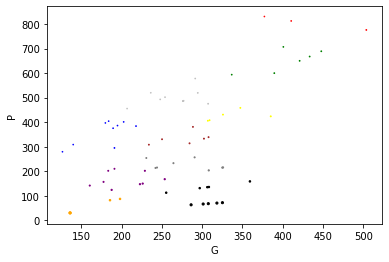

In [67]:
df0=df_new[df_new.cluster==0]
df1=df_new[df_new.cluster==1]
df2=df_new[df_new.cluster==2]
df3=df_new[df_new.cluster==3]
df4=df_new[df_new.cluster==4]
df5=df_new[df_new.cluster==5]
df6=df_new[df_new.cluster==6]
df7=df_new[df_new.cluster==7]
df8=df_new[df_new.cluster==8]
df9=df_new[df_new.cluster==9]

plt.scatter(df0.g_avg,df0.p_avg,df0.avg_ratio, color='g')
plt.scatter(df1.g_avg,df1.p_avg,df1.avg_ratio, color='black')
plt.scatter(df2.g_avg,df2.p_avg,df2.avg_ratio, color='blue')
plt.scatter(df3.g_avg,df3.p_avg,df3.avg_ratio, color='yellow')
plt.scatter(df4.g_avg,df4.p_avg,df4.avg_ratio, color='red')
plt.scatter(df5.g_avg,df5.p_avg,df5.avg_ratio, color='orange')
plt.scatter(df6.g_avg,df6.p_avg,df6.avg_ratio, color='purple')
plt.scatter(df7.g_avg,df7.p_avg,df7.avg_ratio,color='grey')
plt.scatter(df8.g_avg,df8.p_avg,df8.avg_ratio,color='silver')
plt.scatter(df9.g_avg,df9.p_avg,df9.avg_ratio, color='brown')

#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='r', marker='*')

plt.xlabel('G')
plt.ylabel('P')

data nomalisation

In [68]:
scaler= MinMaxScaler()
scaler.fit(df_new[['g_avg']])
df_new[['g_avg']]=scaler.transform(df_new[['g_avg']])
scaler.fit(df_new[['p_avg']])
df_new[['p_avg']]=scaler.transform(df_new[['p_avg']])
df_new.head()

,g_avg,p_avg,avg_ratio,cluster
0,0.035368,0.347784,0.454303,2
1,0.290674,0.611660,0.454772,8
2,0.152011,0.467104,0.455694,2
3,0.000000,0.311386,0.453976,2
4,0.212736,0.531200,0.454600,8


In [69]:
y_pred=km.fit_predict(df_new)
y_pred

array([8, 7, 8, 8, 7, 4, 8, 4, 7, 7, 7, 8, 8, 8, 7, 7, 7, 6, 6, 8, 7, 8,
       6, 6, 6, 6, 4, 7, 4, 4, 3, 3, 3, 4, 4, 3, 3, 1, 9, 4, 3, 1, 1, 1,
       9, 9, 9, 9, 1, 1, 9, 1, 9, 1, 9, 1, 1, 1, 2, 2, 2, 2, 2, 5, 5, 0,
       5, 5, 0, 5])

In [70]:
df_new['cluster']=y_pred
df_new.head()

,g_avg,p_avg,avg_ratio,cluster
0,0.035368,0.347784,0.454303,8
1,0.290674,0.611660,0.454772,7
2,0.152011,0.467104,0.455694,8
3,0.000000,0.311386,0.453976,8
4,0.212736,0.531200,0.454600,7


Text(0, 0.5, 'P')

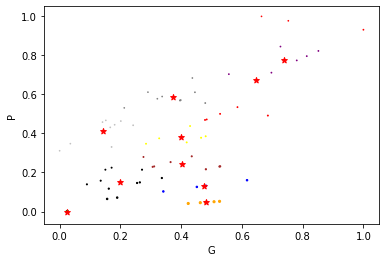

In [72]:
df0=df_new[df_new.cluster==0]
df1=df_new[df_new.cluster==1]
df2=df_new[df_new.cluster==2]
df3=df_new[df_new.cluster==3]
df4=df_new[df_new.cluster==4]
df5=df_new[df_new.cluster==5]
df6=df_new[df_new.cluster==6]
df7=df_new[df_new.cluster==7]
df8=df_new[df_new.cluster==8]
df9=df_new[df_new.cluster==9]

plt.scatter(df0.g_avg,df0.p_avg,df0.avg_ratio, color='g')
plt.scatter(df1.g_avg,df1.p_avg,df1.avg_ratio, color='black')
plt.scatter(df2.g_avg,df2.p_avg,df2.avg_ratio, color='blue')
plt.scatter(df3.g_avg,df3.p_avg,df3.avg_ratio, color='yellow')
plt.scatter(df4.g_avg,df4.p_avg,df4.avg_ratio, color='red')
plt.scatter(df5.g_avg,df5.p_avg,df5.avg_ratio, color='orange')
plt.scatter(df6.g_avg,df6.p_avg,df6.avg_ratio, color='purple')
plt.scatter(df7.g_avg,df7.p_avg,df7.avg_ratio,color='grey')
plt.scatter(df8.g_avg,df8.p_avg,df8.avg_ratio,color='silver')
plt.scatter(df9.g_avg,df9.p_avg,df9.avg_ratio, color='brown')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='r', marker='*')

plt.xlabel('G')
plt.ylabel('P')

Implementing a the elbow technique to find the optimal K value

In [73]:
k_range=range(1,11)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df_new[['g_avg','p_avg','avg_ratio']])
    sse.append(km.inertia_)
sse

[107.49042847476564,
 26.382940350956602,
 9.85291581565225,
 5.927153522559449,
 3.736455628957163,
 2.66014603798794,
 1.9367601570955606,
 1.5182906721580447,
 1.2191190668648535,
 1.0743263228011521]

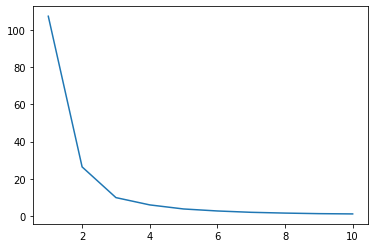

In [74]:
plt.plot(k_range,sse)

In [75]:
km=KMeans(n_clusters=2)
y_pred=km.fit_predict(df_new[['g_avg','p_avg','avg_ratio']])

In [76]:
df_new['cluster']=y_pred

Text(0, 0.5, 'P')

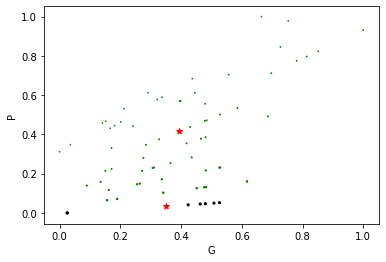

In [77]:
df0=df_new[df_new.cluster==0]
df1=df_new[df_new.cluster==1]
df2=df_new[df_new.cluster==2]


plt.scatter(df0.g_avg,df0.p_avg,df0.avg_ratio, color='g')
plt.scatter(df1.g_avg,df1.p_avg,df1.avg_ratio,color='black')
plt.scatter(df2.g_avg,df2.p_avg,df2.avg_ratio,color='y')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='r', marker='*')

plt.xlabel('G')
plt.ylabel('P')

In [78]:
df_new['avg_ratio'].describe()

count    70.000000
mean      1.330780
std       1.203213
min       0.453671
25%       0.568083
50%       0.833145
75%       1.514723
max       4.547711
Name: avg_ratio, dtype: float64